In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In C:\Users\sufyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sufyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sufyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sufyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sufyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
print('The percentage of Yes class is :%f' % (df['Loan_Status'].value_counts()[0] / len(df) * 100))
print('The percentage of No class is :%f' % (df['Loan_Status'].value_counts()[1] / len(df) * 100))


The percentage of Yes class is :68.729642
The percentage of No class is :31.270358


In [9]:
df1 = df.copy()

#### Data Cleaning 

In [10]:
df1['Gender'].fillna((df1['Gender'].mode()[0]),inplace =True)

In [11]:
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])

In [12]:
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])

In [13]:
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [14]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].median())

In [15]:
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].median())

In [16]:
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])

In [17]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

In [19]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

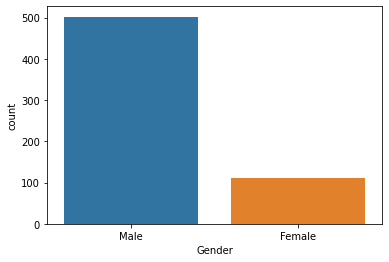

In [20]:
sns.countplot(df1['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

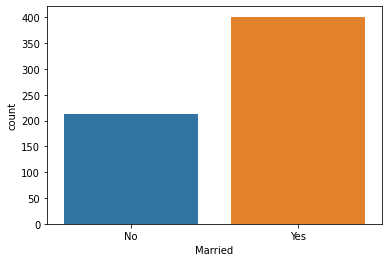

In [21]:
sns.countplot(df1['Married'])

<AxesSubplot:xlabel='Education', ylabel='count'>

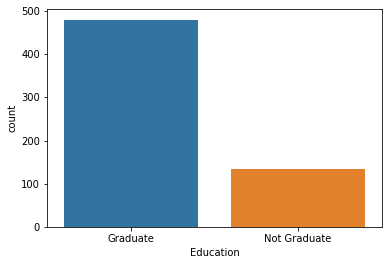

In [22]:
sns.countplot(df1['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

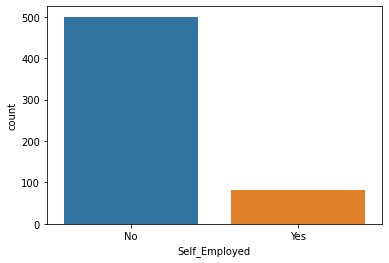

In [23]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

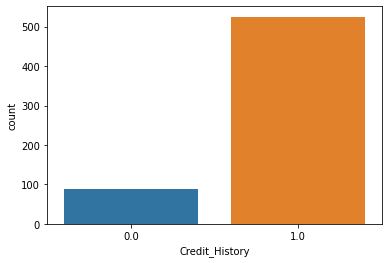

In [24]:
sns.countplot(df1['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

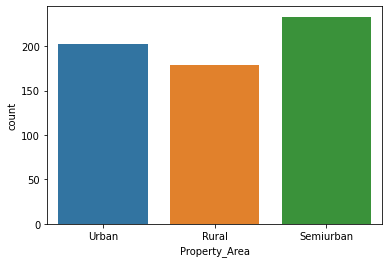

In [25]:
sns.countplot(df1['Property_Area'])

<AxesSubplot:xlabel='ApplicantIncome'>

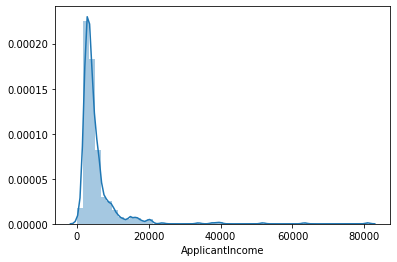

In [26]:
sns.distplot(df1['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

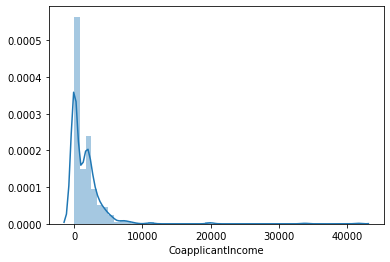

In [27]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount'>

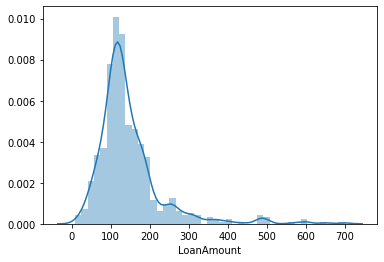

In [28]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term'>

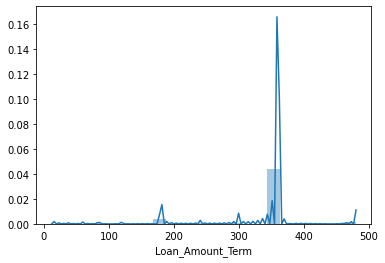

In [29]:
sns.distplot(df['Loan_Amount_Term'])


<AxesSubplot:xlabel='Credit_History'>

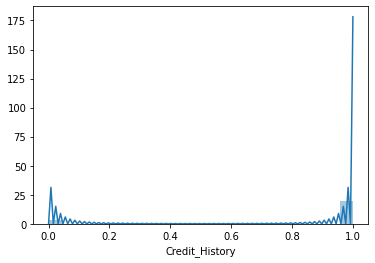

In [30]:
sns.distplot(df['Credit_History'])

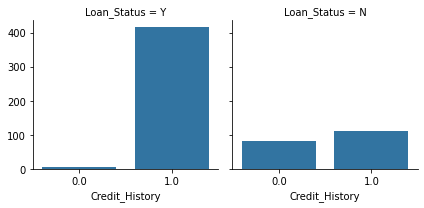

In [31]:
grid = sns.FacetGrid(df1,col='Loan_Status')
grid.map(sns.countplot,'Credit_History')

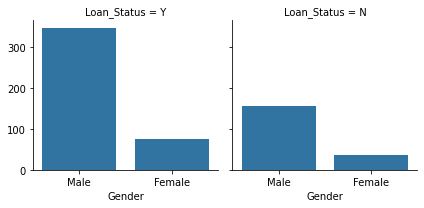

In [32]:
grid = sns.FacetGrid(df1,col='Loan_Status')
grid.map(sns.countplot,'Gender');

<AxesSubplot:xlabel='Married', ylabel='count'>

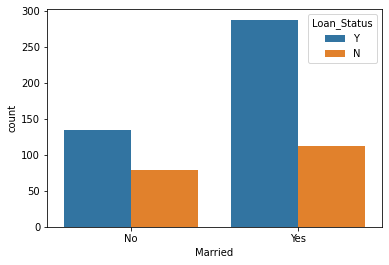

In [33]:
sns.countplot(df1['Married'],hue=df['Loan_Status'])

In [34]:
df1.drop(columns='Loan_ID',inplace=True)

### Creation of new attributes

In [35]:
#total income
df1['Total_Income'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


### Coorelation Matrix

<AxesSubplot:>

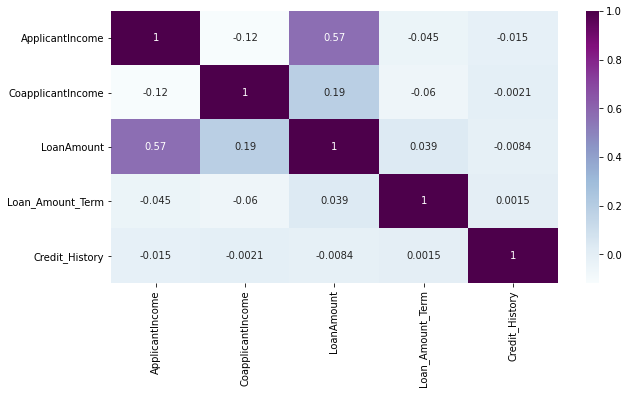

In [36]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [37]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income",'Loan_Status']
df_cat = df1.drop(columns=cols, axis=1)
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


### Label Encoding

In [38]:
cat_data = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    df_cat[i] = le.fit_transform(df_cat[i])

In [39]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [40]:
df_num = df1.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area'],axis='columns')
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Total_Income
0,5849,0.0,128.0,360.0,Y,5849.0
1,4583,1508.0,128.0,360.0,N,6091.0
2,3000,0.0,66.0,360.0,Y,3000.0
3,2583,2358.0,120.0,360.0,Y,4941.0
4,6000,0.0,141.0,360.0,Y,6000.0


In [41]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [42]:
target = df1['Loan_Status']
target.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [43]:
df3 = pd.concat([df_cat,df_num,target],axis=1)
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Total_Income,Loan_Status
0,1,0,0,0,0,1,2,5849,0.0,128.0,360.0,Y,5849.0,Y
1,1,1,1,0,0,1,0,4583,1508.0,128.0,360.0,N,6091.0,N
2,1,1,0,0,1,1,2,3000,0.0,66.0,360.0,Y,3000.0,Y
3,1,1,0,1,0,1,2,2583,2358.0,120.0,360.0,Y,4941.0,Y
4,1,0,0,0,0,1,2,6000,0.0,141.0,360.0,Y,6000.0,Y


In [44]:
df3 = df3.loc[:,~df3.columns.duplicated()]
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Total_Income
0,1,0,0,0,0,1,2,5849,0.0,128.0,360.0,Y,5849.0
1,1,1,1,0,0,1,0,4583,1508.0,128.0,360.0,N,6091.0
2,1,1,0,0,1,1,2,3000,0.0,66.0,360.0,Y,3000.0
3,1,1,0,1,0,1,2,2583,2358.0,120.0,360.0,Y,4941.0
4,1,0,0,0,0,1,2,6000,0.0,141.0,360.0,Y,6000.0


### Train - Test Split

In [50]:
# specify input and output attributes
X = df3.drop(columns=['Loan_Status'], axis=1)
y = df3['Loan_Status']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Model Training

In [52]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    print("Accuracy is", model.score(X_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.46800634584876


In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 74.02597402597402
Cross validation is 73.14912744579587


In [55]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 75.41248016922265


In [56]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 73.31041776837652


### Hyperparameter tuning

In [57]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 79.64833421470122


### Confusion Matrix

In [59]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[30, 24],
       [ 9, 91]], dtype=int64)

<AxesSubplot:>

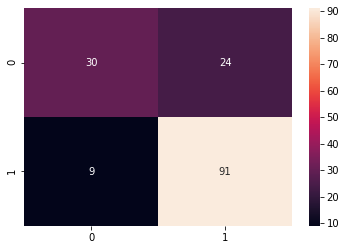

In [61]:
sns.heatmap(cm, annot=True)